过拟合的原因是学习样本太少，导致无法训练出能够泛化到新数据的模型。
如果拥有无限的数据，那么模型能够观察到数据分布的所有内容，这样就永远不会过拟合。
数据增强是从现有的训练样本中生成更多的训练数据，其方法是利用多种能够生成可信图像的随机变换来增加augment）样本。
其目标是，模型在训练时不会两次查看完全相同的图像。这让模型能够观察到数据的更多内容，从而具有更好的泛化能力

在 Keras 中，这可以通过对 ImageDataGenerator 实例读取的图像执行多次随机变换来实现

datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')


rotation_range 是角度值（在 0~180 范围内），表示图像随机旋转的角度范围。
width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围（相对于总宽
度或总高度的比例）。
shear_range 是随机错切变换的角度。
zoom_range 是图像随机缩放的范围。
horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设（比如真实世界的图像），这种做法是有意义的。
fill_mode是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度/高度平移

参看 dogcat_data_st.ipynb

如果你使用这种数据增强来训练一个新网络，那么网络将不会两次看到同样的输入。但网
络看到的输入仍然是高度相关的，因为这些输入都来自于少量的原始图像。你无法生成新信息，
而只能混合现有信息。因此，这种方法可能不足以完全消除过拟合。为了进一步降低过拟合，
你还需要向模型中添加一个 Dropout 层，添加到密集连接分类器之前

In [1]:
from tensorflow.keras import layers 
from tensorflow.keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
# 了进一步降低过拟合
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

train_dir = 'D:\\TrainData\\dog_cat_small\\train'
validation_dir = 'D:\\TrainData\\dog_cat_small\\validation'
test_dir = 'D:\\TrainData\\dog_cat_small\\test'

# 将所有图像乘以 1/255 缩放
train_datagen = ImageDataGenerator(rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,) 
# 注意，不能增强验证数据
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20,class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20,class_mode='binary')


history = model.fit(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

#把模型保存下来
model.save('cats_and_dogs_small_2.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

d:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
100/100 [==============================] - 11s 91ms/step - loss: 0.6960 - acc: 0.5065 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 9s 92ms/step - loss: 0.6889 - acc: 0.5300 - val_loss: 0.6896 - val_acc: 0.5070
Epoch 3/100
100/100 [==============================] - 9s 94ms/step - loss: 0.6827 - acc: 0.5685 - val_loss: 0.6570 - val_acc: 0.6150
Epoch 4/100
100/100 [==============================] - 9s 91ms/step - loss: 0.6717 - acc: 0.5780 - val_loss: 0.6384 - val_acc: 0.6220
Epoch 5/100
100/100 [==============================] - 9s 92ms/step - loss: 0.6616 - acc: 0.6005 - val_loss: 0.6923 - val_acc: 0.5530
Epoch 6/100
100/100 [==============================] - 9s 91ms/step - loss: 0.6488 - acc: 0.6160 - val_loss: 0.6216 - val_acc: 0.6520
Epoch 7/100
100/100 [==============================] - 9s 92ms/step - loss: 0.6283 - acc: 0.6495 - val_loss: 0.6113 - val_acc: 0.6550
Epoch 8/100
100/100 [==============================] - 9s 91m

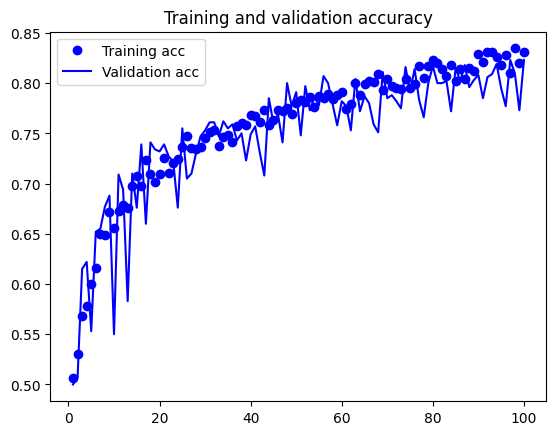

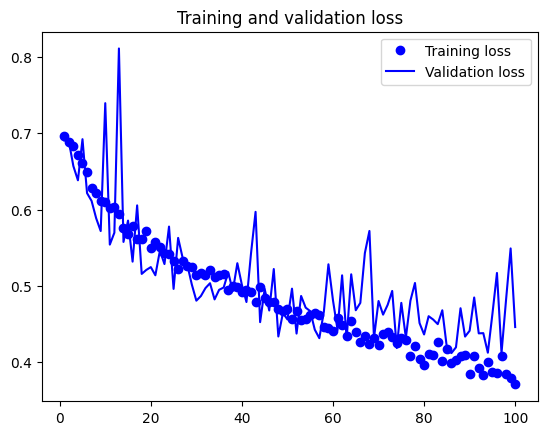

In [2]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()